In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

/Users/junyang/anaconda2/envs/p3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Problem 2: Interpolation between images using GAN 

## a) Train a GAN on MNIST using class code as starting point

In [2]:
 def variables_from_scope(scope_name):
    """
    Returns a list of all trainable variables in a given scope. This is useful when
    you'd like to back-propagate only to weights in one part of the network
    (in our case, the generator or the discriminator).
    """
    return tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=scope_name)

In [3]:
def visualize_row_GAN(images, img_dim=28, cmap='gray'):
    """
    Takes in a tensor of images of given width, and displays them in a row
    in a plot, using `cmap` to map from numbers to colors.
    """
    im = np.concatenate(np.reshape(images, [-1,img_dim,img_dim]), 1)
    plt.figure()
    plt.axis('off')
    plt.imshow(im, cmap=cmap)
    plt.show()

In [4]:
# Graph parameters
z_dimension = 32
intermediate_layer_size = 128
image_size = 784

# Training parameters
batch_size = 50
iterations = 25000

In [5]:
# Generator
def generator(z):
    hidden_layer = tf.layers.dense(z, intermediate_layer_size, name="G1", activation=tf.nn.relu)
    fake_X = tf.layers.dense(hidden_layer, image_size, name="G2", activation=tf.sigmoid)
    return fake_X

In [6]:
# Discriminator
def discriminator(images):
    hidden_layer = tf.layers.dense(images, intermediate_layer_size, name="D1", activation=tf.nn.relu)
    D_output = tf.layers.dense(hidden_layer, 1, name="D2", activation=tf.sigmoid)
    return D_output

In [104]:
tf.reset_default_graph()

# Placeholders
real_X = tf.placeholder(tf.float32, [None, image_size])
z = tf.placeholder(tf.float32, [None, z_dimension])

# Generator
with tf.variable_scope("generator") as scope:
    fake_X = generator(z)

# Discriminator
with tf.variable_scope("discriminator") as scope:
    d_on_fake = discriminator(fake_X)
    scope.reuse_variables()
    d_on_real = discriminator(real_X)

# Loss
g_loss = -tf.reduce_mean(tf.log(d_on_fake))
d_loss = -tf.reduce_mean(tf.log(d_on_real) + tf.log(1. - d_on_fake))

# Optimizer
optimizer = tf.train.AdamOptimizer()
d_step = optimizer.minimize(d_loss, var_list=variables_from_scope("discriminator"))
g_step = optimizer.minimize(g_loss, var_list=variables_from_scope("generator"))

# Initializer
initialize_all = tf.global_variables_initializer()

Iter [       0] Time [0.1139] d_loss [1.6643]


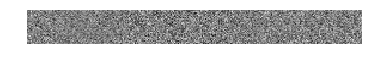

Iter [    1000] Time [4.1520] d_loss [0.1099]


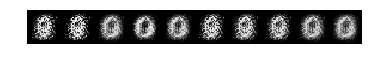

Iter [    2000] Time [8.3874] d_loss [0.0924]


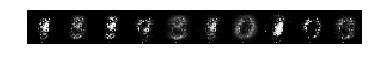

Iter [    3000] Time [12.7157] d_loss [0.1625]


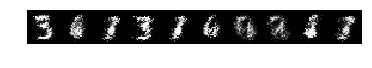

Iter [    4000] Time [16.9580] d_loss [0.1921]


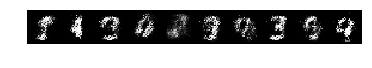

Iter [    5000] Time [21.2976] d_loss [0.3036]


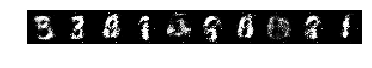

Iter [    6000] Time [25.5097] d_loss [0.4308]


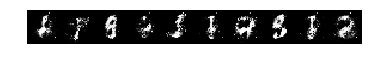

Iter [    7000] Time [29.5064] d_loss [0.9829]


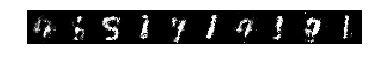

Iter [    8000] Time [33.8032] d_loss [0.4657]


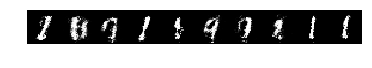

Iter [    9000] Time [38.1021] d_loss [0.6208]


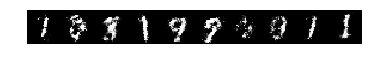

Iter [   10000] Time [42.4133] d_loss [0.4377]


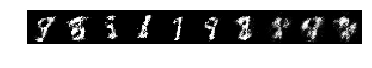

Iter [   11000] Time [46.6313] d_loss [0.6115]


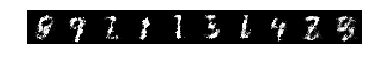

Iter [   12000] Time [50.6538] d_loss [0.6726]


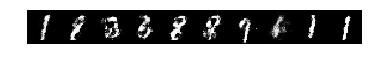

Iter [   13000] Time [54.9582] d_loss [0.8087]


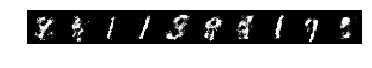

Iter [   14000] Time [59.2351] d_loss [0.7142]


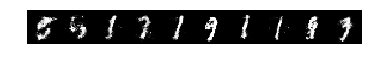

Iter [   15000] Time [63.4787] d_loss [0.7591]


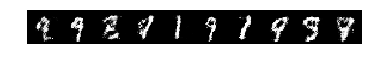

Iter [   16000] Time [67.8629] d_loss [0.3650]


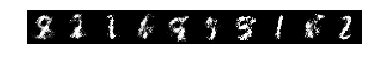

Iter [   17000] Time [72.1439] d_loss [0.6676]


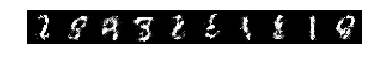

Iter [   18000] Time [76.1862] d_loss [0.7288]


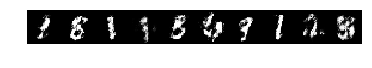

Iter [   19000] Time [80.5874] d_loss [0.8171]


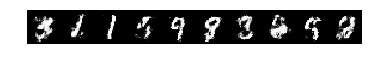

Iter [   20000] Time [84.8597] d_loss [0.6243]


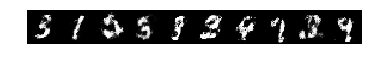

Iter [   21000] Time [89.1207] d_loss [0.7005]


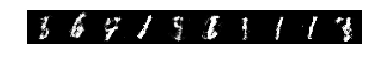

Iter [   22000] Time [93.4693] d_loss [0.8367]


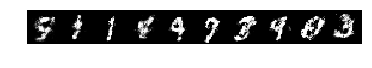

Iter [   23000] Time [97.6562] d_loss [0.7219]


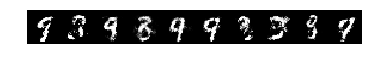

Iter [   24000] Time [101.8738] d_loss [0.7486]


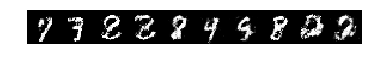

Iter [   24999] Time [106.1660] d_loss [0.7455]


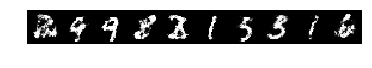

In [105]:
# Train the GAN.
def make_noise():
    return np.random.uniform(-1.0, 1.0, [batch_size, z_dimension])

def next_feed_dict():
    return {real_X: mnist.train.next_batch(batch_size)[0],
            z:      make_noise()}

sess = tf.Session()
sess.run(initialize_all)

start_time = time.time()
for t in range(iterations):
    sess.run(g_step, feed_dict=next_feed_dict())
    _, loss = sess.run([d_step, d_loss], feed_dict=next_feed_dict())

    if t % 1000 == 0 or t+1 == iterations:
        fake_data = sess.run(fake_X, feed_dict={z: make_noise()})
        print('Iter [%8d] Time [%5.4f] d_loss [%.4f]' % (t, time.time() - start_time, loss))
        visualize_row_GAN(fake_data[:10])

## b) Generate some images, say 10, by first drawing samples, $\epsilon$, from the simple distribution and then feeding them through the generator

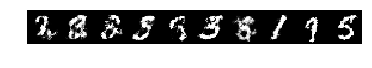

In [106]:
random_seeds = np.random.uniform(-1.0, 1.0, [10, z_dimension])
syn_figures = sess.run(fake_X, feed_dict={z: random_seeds})
visualize_row_GAN(syn_figures)

## c) Visualize the images and pick any two (preferably different digit labels), identify their inputs and set them to $\epsilon_s$ and $\epsilon_e$.

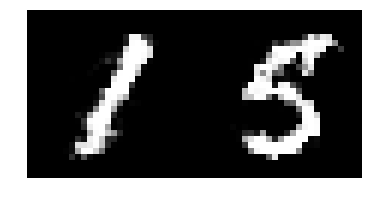

In [108]:
epsilon_start = np.reshape(random_seeds[7,:],(1,z_dimension))
epsilon_end = np.reshape(random_seeds[9,:],(1,z_dimension))
seeds = np.concatenate((epsilon_start, epsilon_end), axis=0)
fakes = sess.run(fake_X, feed_dict={z: seeds})
visualize_row_GAN(fakes[:2])

## d) Generate 10 steps between $\epsilon_s$ and $\epsilon_e$ by linear interpolation

In [109]:
new_random_seeds = []
for i in range(z_dimension):
    x = np.linspace(0, 1, 2)
    #print(x)
    xval = np.linspace(0,1,11)
    #print(xval)
    y = [epsilon_start[0,i],epsilon_end[0,i]]
    #print(y)
    new_random_seeds.append(np.interp(xval, x, y))
    #print(np.interp(xval, x, y))
new_random_seeds = np.array(new_random_seeds).transpose()


## e) Generate 10 images using $\epsilon_s$= $\epsilon_1$,...,$\epsilon_{10}$= $\epsilon_e$ as inputs to the generator and visualize them.

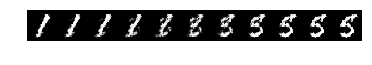

In [110]:
evolving_fakes = sess.run(fake_X, feed_dict={z: new_random_seeds})
visualize_row_GAN(evolving_fakes)

In [111]:
sess.close()

# Problem 3. Interpolating with variational autoencoders

## a) Train a variational autoencoder on MNIST using class code as starting point

In [112]:
def encoder(x):
    """Network q(z|x)"""
    mu_logvar = tf.layers.dense(x, 128, name="fc1", activation=tf.nn.relu)
    mu_logvar = tf.layers.dense(mu_logvar, 128, name="fc2", activation=None)
        
    return mu_logvar

In [113]:
def decoder(mu_logvar):
    """Network p(x|z)"""
    # Interpret z as concatenation of mean and log variance
    mu, logvar = tf.split(mu_logvar, num_or_size_splits=2, axis=1)

    # Standard deviation must be positive
    stddev = tf.sqrt(tf.exp(logvar))

    # Draw a z from the distribution
    epsilon = tf.random_normal(tf.shape(stddev))
    z = mu + tf.multiply(stddev, epsilon)

    # Decoding arm
    x_logits = tf.layers.dense(z, 128, name="fc3", activation=tf.nn.relu)
    x_logits = tf.layers.dense(x_logits, 784, name="fc4", activation=None)

    # x_hat to be generated from a Bernoulli distribution
    x_dist = tf.contrib.distributions.Bernoulli(logits=x_logits, dtype=tf.float32)
        
    return x_logits, x_dist

In [114]:
def optimizer(x_logits, x, mu_logvar):
    """Define loss functions (reconstruction, KL divergence) and optimizer"""
    with tf.variable_scope('optimizer') as scope:            
        # Reconstruction loss
        reconstruction = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=x_logits), reduction_indices=[1])
 
        # KL divergence
        mu, logvar = tf.split(mu_logvar, num_or_size_splits=2, axis=1)
        kl_d = -0.5 * tf.reduce_sum(1.0 + logvar - tf.square(mu) - tf.exp(logvar), reduction_indices=[1])
        
        # Total loss
        loss = tf.reduce_mean(reconstruction + kl_d)
            
        # ADAM optimizer
        train_step = tf.train.AdamOptimizer().minimize(loss)
    
    return train_step

In [115]:
def visualize_row(image, reconstruction, img_width=28, cmap='gray'):
    """
    Takes in a tensor of images of given width, and displays them in a column
    in a plot, using `cmap` to map from numbers to colors.
    """
    fig, ax = plt.subplots(1, 2)
    image = np.reshape(image, [-1, img_width])
    reconstruction = np.reshape(reconstruction, [-1, img_width])
    plt.figure()
    ax[0].imshow(np.clip(image, 0, 1), cmap=cmap)
    ax[1].imshow(np.clip(reconstruction, 0, 1), cmap=cmap)
    plt.show()

In [116]:
# Reset the graph
tf.reset_default_graph()

# Define input placeholder
x = tf.placeholder(tf.float32,[None, 784], name='x')

# Define VAE graph
with tf.variable_scope('encoder'):
    mu_logvar = encoder(x)
with tf.variable_scope('decoder'):
    x_logits, x_dist = decoder(mu_logvar)
    x_hat = x_dist.sample()

# Optimization
with tf.variable_scope('unlabeled') as scope:
    train_step_unlabeled = optimizer(x_logits, x, mu_logvar)

Iteration 0:


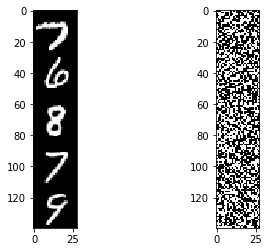

Iteration 1000:


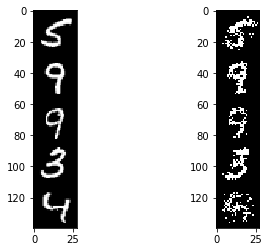

Iteration 2000:


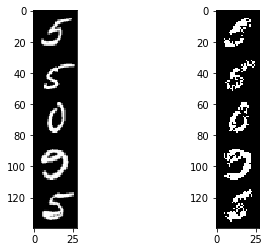

Iteration 3000:


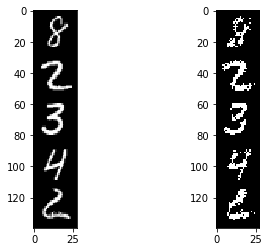

Iteration 4000:


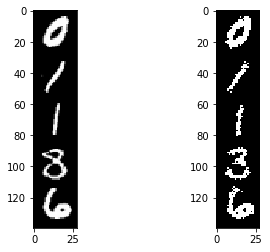

Iteration 5000:


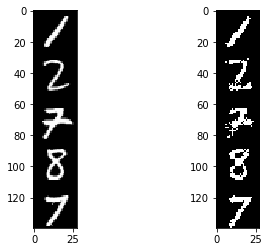

Iteration 6000:


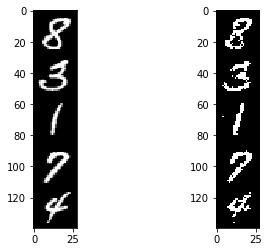

Iteration 7000:


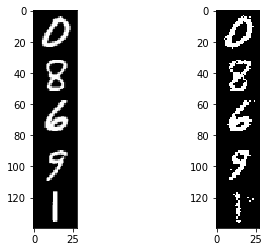

Iteration 8000:


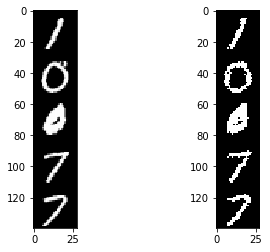

Iteration 9000:


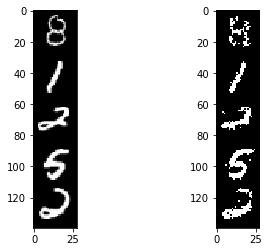

Iteration 10000:


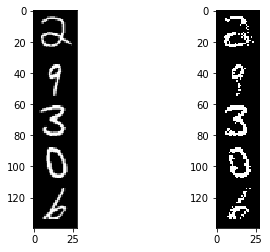

Iteration 11000:


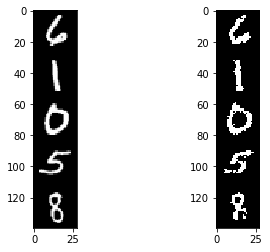

Iteration 12000:


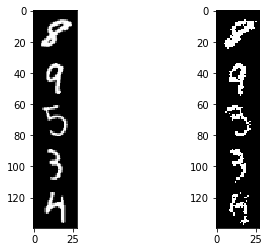

Iteration 13000:


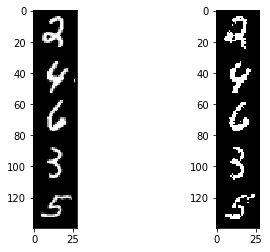

Iteration 14000:


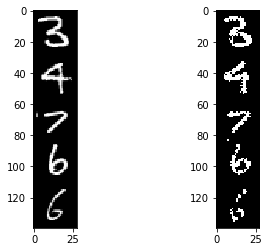

Iteration 15000:


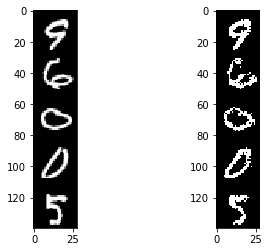

Iteration 16000:


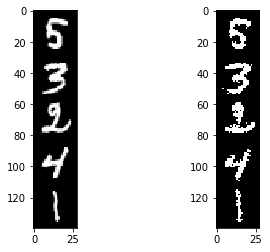

Iteration 17000:


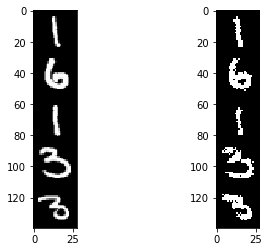

Iteration 18000:


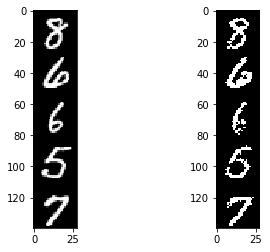

Iteration 19000:


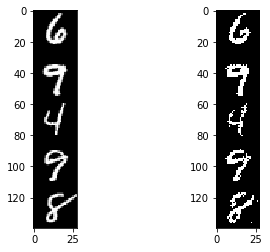

In [117]:
sess = tf.Session()
# Initialize all variables
sess.run(tf.global_variables_initializer())

# Train VAE model
for i in range(20000):        
    # Get a training minibatch
    batch = mnist.train.next_batch(100)

    # Binarize the data
    x_binarized = (batch[0] > 0.5).astype(np.float32)

    # Train on minibatch
    sess.run(train_step_unlabeled, feed_dict={x: x_binarized}) # No labels

    # Visualize reconstructions every 1000 iterations
    if i % 1000 == 0:
        batch = mnist.validation.next_batch(5)
        x_binarized = (batch[0] > 0.5).astype(np.float32)
        reconstructions = sess.run(x_hat, feed_dict={x: x_binarized})
        print("Iteration {0}:".format(i))
        visualize_row(batch[0], reconstructions)

## b) Using the encoder, generate latent representations for 2 images ($z_{start}$ and $z_{end}$) matching the digit labels selected in Problem 2c.

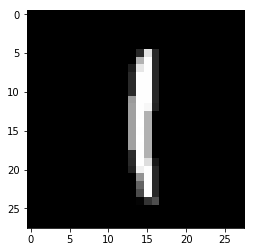

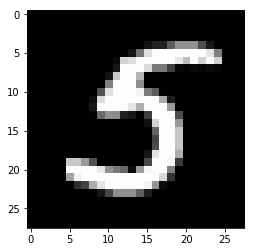

In [164]:
image8 = np.reshape(mnist.train.images[6,:],[28,28])
plt.imshow(image8, cmap='gray')
plt.show()
image9 = np.reshape(mnist.train.images[67,:],[28,28])
plt.imshow(image9, cmap='gray')
plt.show()
# visualize_row_GAN(mnist.train.images[60:70,:])

In [165]:
# print((image3 > 0.5).astype(np.float32))
latent_8 = sess.run(mu_logvar, feed_dict={x:(image8.reshape((1,784)) > 0.5).astype(np.float32)})
latent_9 = sess.run(mu_logvar, feed_dict={x:(image9.reshape((1,784)) > 0.5).astype(np.float32)})

## c) Generate (via decoding) and visualize images from 10 steps $z_{start} = z_1,...,z_{10} = z_{end}$ using linear interpolation.

In [166]:
new_latent_seeds = []
for i in range(128):
    x = np.linspace(0, 1, 2)
    #print(x)
    xval = np.linspace(0,1,11)
    #print(xval)
    y = [latent_8[0,i],latent_9[0,i]]
    #print(y)
    new_latent_seeds.append(np.interp(xval, x, y))
    #print(np.interp(xval, x, y))
new_latent_seeds = np.array(new_latent_seeds).transpose()

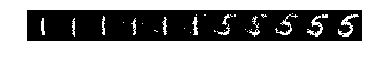

In [167]:
reconstructions = sess.run(x_hat, feed_dict={mu_logvar: new_latent_seeds})
# reconstructions = np.reshape(reconstructions, [-1, 28])
# plt.imshow(np.clip(reconstructions, 0, 1), cmap='gray')
# plt.show()

reconstructions = np.concatenate(np.reshape(reconstructions, [-1,28,28]), 1)
plt.axis('off')
plt.imshow(reconstructions, cmap='gray')
plt.show()

In [168]:
sess.close()

## d) How does the quality of the VAE generated images compare to those from GAN?

Images generated by VAE are more 'noisy' compared to those generated from GAN. VAE's objective goal is to learn a latent representations of the images, while one of GAN's objective goal is to make discriminator not be able to distinguish between real and generated images. That's the reason why GAN can generate more high quality 'fake' images.

## e) Do you observe any differences in the smoothness of the interpolation from both models?

Yes, VAE has a smoother interpolation of images compared to GAN.



# Problem 4: Conditioning on class labels 

## a) Modify the code from Problem 2 to take as input a vector 10 times larger.

In [213]:
# Graph parameters
z_dimension = 320
intermediate_layer_size = 128
image_size = 784

# Training parameters
batch_size = 50
iterations = 55000

## b) Modify the code from Problem 2 to take as input the concatenation of $\epsilon$ (random vector) and a one-hot vector encoding of the labels.

In [222]:
# Generator
def generator(z, y):
    #z = np.concatenate((z,y), axis=1)
    z = tf.concat(axis=1, values=[z, y])
    hidden_layer = tf.layers.dense(z, intermediate_layer_size, name="G1", activation=tf.nn.relu)
    fake_X = tf.layers.dense(hidden_layer, image_size, name="G2", activation=tf.sigmoid)
    return fake_X

# Discriminator
def discriminator(images, y):
    # images = np.concatenate((images, y), axis=1)
    images = tf.concat(axis=1, values=[images, y])
    hidden_layer = tf.layers.dense(images, intermediate_layer_size, name="D1", activation=tf.nn.relu)
    D_output = tf.layers.dense(hidden_layer, 1, name="D2", activation=tf.sigmoid)
    return D_output

## c) Train the GAN

In [223]:
tf.reset_default_graph()

# Placeholders
real_X = tf.placeholder(tf.float32, [None, image_size])
z = tf.placeholder(tf.float32, [None, z_dimension])
y = tf.placeholder(tf.float32,[None, 10])

# Generator
with tf.variable_scope("generator") as scope:
    fake_X = generator(z,y)

# Discriminator
with tf.variable_scope("discriminator") as scope:
    d_on_fake = discriminator(fake_X,y)
    scope.reuse_variables()
    d_on_real = discriminator(real_X,y)

# Loss
g_loss = -tf.reduce_mean(tf.log(d_on_fake))
d_loss = -tf.reduce_mean(tf.log(d_on_real) + tf.log(1. - d_on_fake))

# Optimizer
optimizer = tf.train.AdamOptimizer()
d_step = optimizer.minimize(d_loss, var_list=variables_from_scope("discriminator"))
g_step = optimizer.minimize(g_loss, var_list=variables_from_scope("generator"))

# Initializer
initialize_all = tf.global_variables_initializer()

Iter [       0] Time [0.1251] d_loss [1.6039]


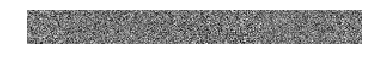

Iter [    1000] Time [4.8126] d_loss [0.0234]


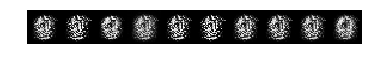

Iter [    2000] Time [9.6093] d_loss [0.0815]


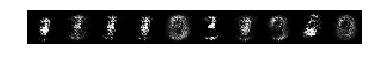

Iter [    3000] Time [14.3284] d_loss [0.1373]


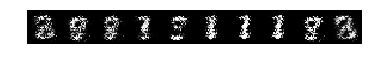

Iter [    4000] Time [19.4352] d_loss [0.1648]


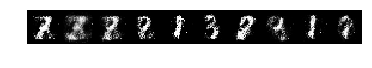

Iter [    5000] Time [24.4984] d_loss [0.4599]


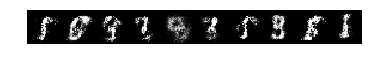

Iter [    6000] Time [29.6221] d_loss [0.3685]


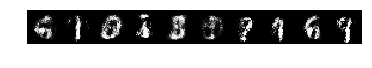

Iter [    7000] Time [34.6923] d_loss [0.6776]


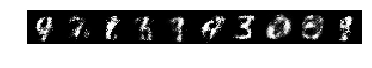

Iter [    8000] Time [39.9527] d_loss [0.9148]


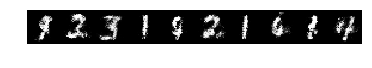

Iter [    9000] Time [45.0745] d_loss [0.8991]


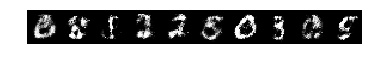

Iter [   10000] Time [50.0286] d_loss [0.6999]


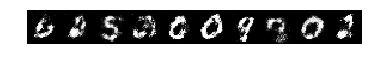

Iter [   11000] Time [54.8771] d_loss [1.0163]


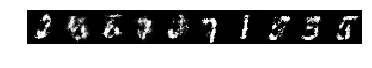

Iter [   12000] Time [59.6683] d_loss [0.4565]


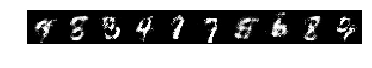

Iter [   13000] Time [64.3810] d_loss [0.6907]


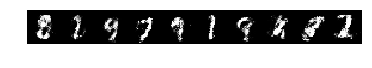

Iter [   14000] Time [68.8893] d_loss [0.8063]


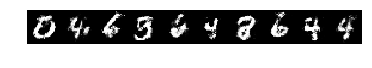

Iter [   15000] Time [73.7671] d_loss [0.8911]


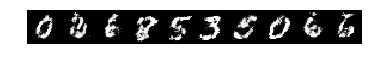

Iter [   16000] Time [78.7395] d_loss [0.9197]


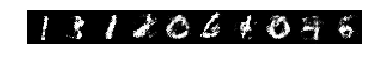

Iter [   17000] Time [83.5378] d_loss [0.6417]


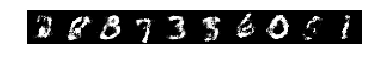

Iter [   18000] Time [88.3493] d_loss [0.9788]


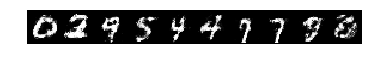

Iter [   19000] Time [93.0550] d_loss [0.8255]


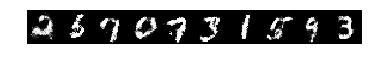

Iter [   20000] Time [97.8238] d_loss [0.8529]


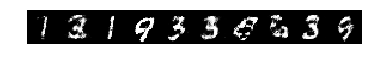

Iter [   21000] Time [102.6736] d_loss [0.7527]


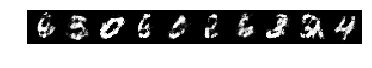

Iter [   22000] Time [107.4125] d_loss [0.8803]


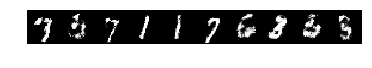

Iter [   23000] Time [112.1059] d_loss [0.8584]


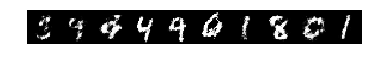

Iter [   24000] Time [116.9816] d_loss [0.9488]


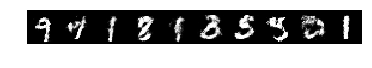

Iter [   25000] Time [121.7135] d_loss [0.7952]


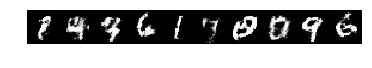

Iter [   26000] Time [126.5833] d_loss [0.8820]


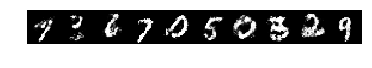

Iter [   27000] Time [131.3106] d_loss [0.9222]


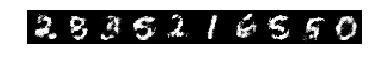

Iter [   28000] Time [136.1088] d_loss [0.9377]


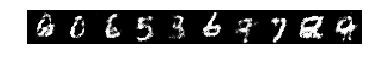

Iter [   29000] Time [141.3204] d_loss [0.9393]


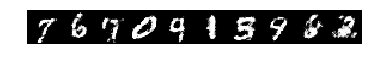

Iter [   30000] Time [146.0989] d_loss [0.7055]


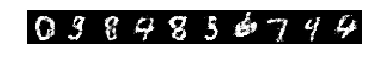

Iter [   31000] Time [151.1328] d_loss [0.8818]


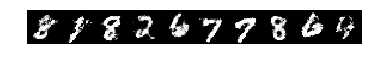

Iter [   32000] Time [155.7853] d_loss [0.7914]


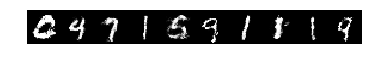

Iter [   33000] Time [160.6964] d_loss [0.8779]


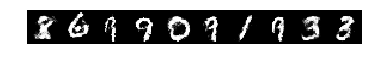

Iter [   34000] Time [165.5788] d_loss [0.8961]


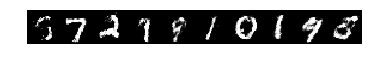

Iter [   35000] Time [170.1674] d_loss [0.8393]


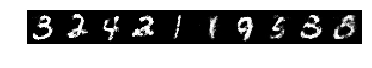

Iter [   36000] Time [174.7265] d_loss [0.9465]


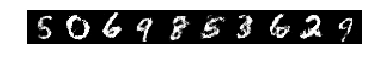

Iter [   37000] Time [179.4795] d_loss [0.8093]


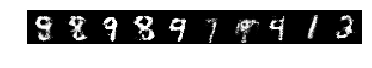

Iter [   38000] Time [184.3771] d_loss [0.6468]


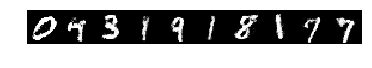

Iter [   39000] Time [189.2228] d_loss [0.9478]


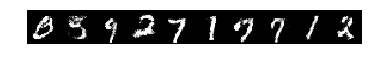

Iter [   40000] Time [194.0273] d_loss [0.9377]


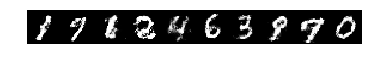

Iter [   41000] Time [198.9096] d_loss [0.7330]


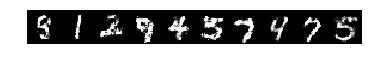

Iter [   42000] Time [203.6599] d_loss [0.6577]


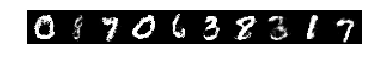

Iter [   43000] Time [208.4659] d_loss [0.9740]


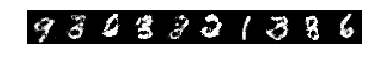

Iter [   44000] Time [213.2627] d_loss [0.9961]


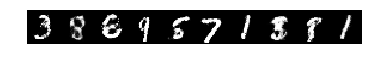

Iter [   45000] Time [218.1925] d_loss [0.6697]


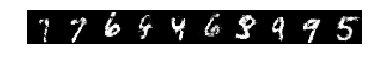

Iter [   46000] Time [222.7581] d_loss [0.8076]


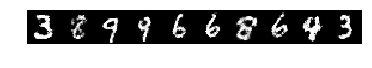

Iter [   47000] Time [227.6435] d_loss [0.9929]


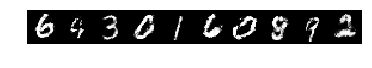

Iter [   48000] Time [231.9894] d_loss [0.8543]


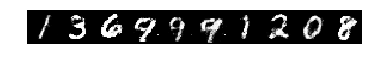

Iter [   49000] Time [236.8633] d_loss [0.8505]


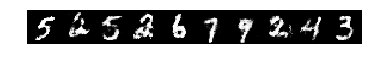

Iter [   50000] Time [241.6831] d_loss [0.8413]


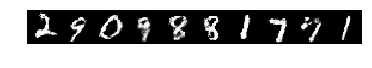

Iter [   51000] Time [246.6131] d_loss [0.7908]


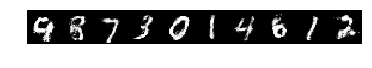

Iter [   52000] Time [251.5320] d_loss [0.8169]


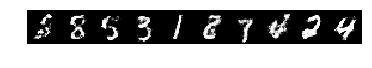

Iter [   53000] Time [256.3744] d_loss [0.8856]


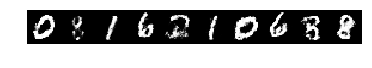

Iter [   54000] Time [261.1319] d_loss [0.9194]


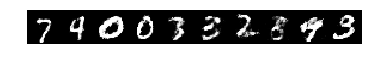

Iter [   54999] Time [266.0515] d_loss [0.9439]


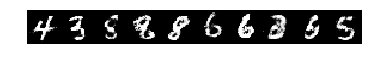

In [225]:
# Train the GAN.
def make_noise():
    #randoms = np.random.uniform(-1.0, 1.0, [batch_size, z_dimension])
    return np.random.uniform(-1.0, 1.0, [batch_size, z_dimension])

def next_feed_dict():
    batch = mnist.train.next_batch(batch_size)
    return {real_X: batch[0],
            z:      make_noise(),
            y:      batch[1]}

sess = tf.Session()
sess.run(initialize_all)

start_time = time.time()
for t in range(iterations):
    feed_dict = next_feed_dict()
    sess.run(g_step, feed_dict=feed_dict)
    _, loss = sess.run([d_step, d_loss], feed_dict=feed_dict)

    if t % 1000 == 0 or t+1 == iterations:
        fake_data = sess.run(fake_X, feed_dict=next_feed_dict())
        print('Iter [%8d] Time [%5.4f] d_loss [%.4f]' % (t, time.time() - start_time, loss))
        visualize_row_GAN(fake_data[:10])

## d) Generate and visualize 10 images from each digit by setting the labels accordingly as inputs to the generator and $\epsilon$ at random from its distribution.

In [226]:
randomness = np.random.uniform(-1.0, 1.0, [10, z_dimension])
labels = np.zeros((10,10))
for i in range(10):
    labels[i][i] = 1

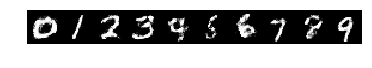

In [229]:
fake_figures = sess.run(fake_X, feed_dict={z: randomness, y: labels})
visualize_row_GAN(fake_figures)